In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lisainstrument import Instrument
from pytdi import Data


In [2]:
def makepdgrm(y,fs=None): 
    n = len(y)
    pdgrm = np.abs(np.fft.fft(y))**2 / n
    pdgrm = pdgrm[:(n//2)] # one sided periodogram
    f = np.linspace(0, 0.5, len(pdgrm))
    if fs is not None:
        pdgrm=pdgrm*2/fs
        f=f*fs/2
    # Fourier frequencies
    return {'pdgrm': pdgrm[1:], 'f': f[1:]}


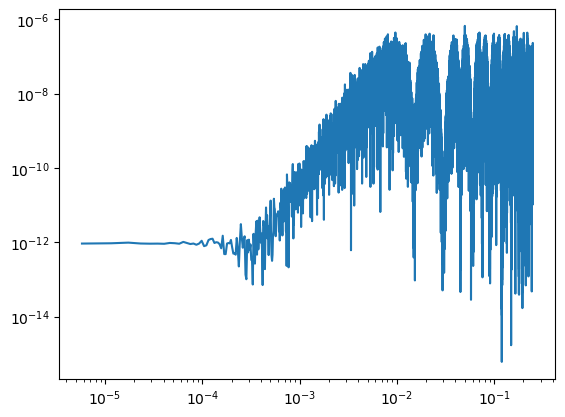

In [4]:
instrument = Instrument(aafilter=None, dt=1, t0=0, size=86400,concurrent=(True))

instrument.disable_all_noises(but='pathlength')
#instrument.disable_dopplers()
instrument.simulate()
outdir="/home/naim769/simulated_lisa_data"
instrument.write(f'{outdir}/my-file.h5', keep_all=True)
data = Data.from_instrument(f"{outdir}/my-file.h5")
from pytdi.michelson import X2, Y2, Z2, X1, Y1,Z1
X2 = X2.build(**data.args)(data.measurements)

y_c=X2-np.mean(X2)
fs=data.fs

pdgrm = makepdgrm(y_c,fs)
f = pdgrm['f']

plt.plot(f,pdgrm['pdgrm'])
plt.xscale('log')
plt.yscale('log')